In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd '/content/gdrive/My Drive/mldatasets'

/content/gdrive/My Drive/mldatasets


In [4]:
ls

Auto.csv  Boston.csv  Default.csv  Hitters.csv  Wage.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [0]:
data = pd.read_csv('Boston.csv')

In [7]:
data.shape

(506, 14)

In [8]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [10]:
data.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

### Observation:
### --> Most of them have a correlation of around +-0.5 with the target variable

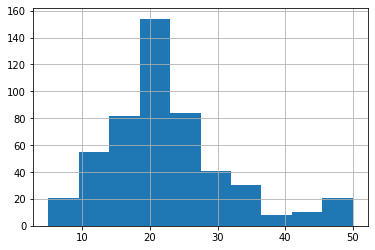

In [11]:
data['medv'].hist()

In [12]:
((data['medv']>=(data['medv'].mean() - 3 * data['medv'].std())) \
                          & (data['medv']<=(data['medv'].mean() + 3 * data['medv'].std()))).sum()

506

In [0]:
X = data.drop('medv',axis = 1)
y = data['medv']

# Check multicollinearity

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [0]:
X_drop_1 = X.drop(['nox','rm','tax','ptratio','age','black'],axis = 1)

In [16]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_drop_1.values, i) for i in range(X_drop_1.shape[1])]
vif["features"] = X_drop_1.columns

vif

,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


### --> Multi-collinearity is required from statistical point of view but not from accuracy point of view.
### --> We will ignore handling multi-collinearity for now


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3, test_size = 0.3)

In [19]:
X_train.shape

(354, 13)

In [0]:
import statsmodels.api as sm

In [0]:
model = sm.OLS(y_train,X_train)
regr = model.fit()

In [22]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              636.1
Date:                Sun, 07 Jun 2020   Prob (F-statistic):                   4.75e-230
Time:                        14:22:19   Log-Likelihood:                         -1062.7
No. Observations:                 354   AIC:                                      2151.
Df Residuals:                     341   BIC:                                      2202.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1298      0.037     -3.471      0.001      -0.203      -0.056
zn             0.0479      0.018      2.696      0.007       0.013       0.083
indus         -0.0647      0.078     -0.828      0.408      -0.218       0.089
chas           3.9233      1.062      3.693      0.000       1.834       6.013
nox           -0.2740      3.927     -0.070      0.944      -7.999       7.451
rm             5.4133      0.372     14.563      0.000       4.682       6.145
age            0.0015      0.017      0.088      0.930      -0.031       0.034
dis           -0.8123      0.225     -3.618      0.000      -1.254      -0.371
rad            0.1847      0.078      2.367      0.019       0.031       0.338
tax           -0.0057      0.005     -1.220      0.223      -0.015       0.003
ptratio       -0.3981      0.134     -2.969      0.003      -0.662      -0.134
black          0.0173      0.003      5.349      0.000       0.011       0.024
lstat         -0.4865      0.062     -7.878      0.000      -0.608      -0.365
==============================================================================
Omnibus:                      142.244   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.640
Skew:                           1.606   Prob(JB):                    8.33e-170
Kurtosis:                       9.517   Cond. No.                     8.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

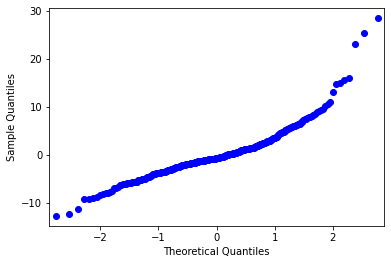

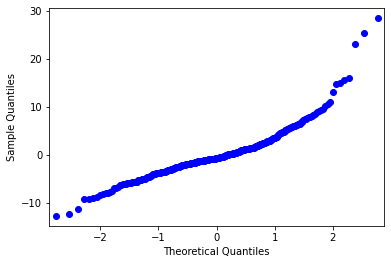

In [23]:
#qqpolot vs. normal distribution
sm.qqplot(regr.resid)

### --> Normality of errors is also required from statistical inference point of view

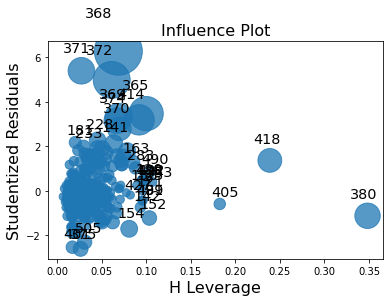

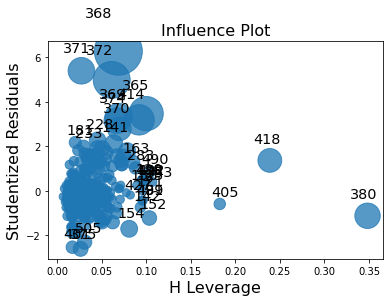

In [24]:
#graphical representation of the influences()
sm.graphics.influence_plot(regr)

### --> There are quite a few influence points

# Influence points based on outlier criteria

In [25]:
regr.outlier_test()

,student_resid,unadj_p,bonf(p)
359,0.033368,0.973400,1.000000
374,3.155229,0.001747,0.618404
98,1.618956,0.106384,1.000000
273,-0.552729,0.580812,1.000000
329,-0.334445,0.738250,1.000000
...,...,...,...
440,-0.815449,0.415386,1.000000
131,-0.392208,0.695150,1.000000
249,0.041243,0.967127,1.000000
152,-1.223930,0.221826,1.000000


In [26]:
(regr.outlier_test()['student_resid'] > 3).sum()

7

In [27]:
(regr.outlier_test()['student_resid'] < -3).sum()

0

In [0]:
outlier_upp = regr.outlier_test()['student_resid'] > 3

In [0]:
outlier_low = regr.outlier_test()['student_resid'] < -3

In [0]:
outlier = np.logical_or(outlier_low, outlier_upp)

# Influence points based on Leverage Statistic

In [31]:
infl = regr.get_influence()
infl

In [32]:
leviers = infl.hat_matrix_diag #leverage
leviers[:10]

array([0.02900116, 0.0668746 , 0.03593382, 0.05134291, 0.05648497,
       0.02588316, 0.07417012, 0.02763276, 0.06873466, 0.0158589 ])

In [0]:
high_lev = leviers>0.08

In [0]:
influ_pts = np.logical_or(outlier, high_lev)

In [0]:
influ_index = X_train.index[influ_pts]

In [0]:
X_train = X_train.drop(influ_index)

In [0]:
y_train = y_train.drop(influ_index)

In [38]:
y_train.head()

359    22.6
98     43.8
273    35.2
329    22.6
170    17.4
Name: medv, dtype: float64

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
params = {'n_estimators': [100,500,1000,2000,3000,5000],
          'max_depth': [8,16,24,32],
          'learning_rate': [0.001,0.01,0.1,0.15,0.2]}

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
gbm = GradientBoostingRegressor(random_state = 0)

In [0]:
gbm_cv = GridSearchCV(gbm, params,scoring='neg_mean_squared_error', cv=5)

In [47]:
gbm_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [0]:
gbm_cv_results = pd.DataFrame(gbm_cv.cv_results_)

In [51]:
gbm_cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [56]:
gbm_cv_results.loc[gbm_cv_results['mean_test_score'].argmax()]

mean_fit_time                                                    5.22933
std_fit_time                                                    0.024421
mean_score_time                                                0.0169315
std_score_time                                                 0.0004365
param_learning_rate                                                0.001
param_max_depth                                                        8
param_n_estimators                                                  3000
params                 {'learning_rate': 0.001, 'max_depth': 8, 'n_es...
split0_test_score                                                -10.073
split1_test_score                                               -9.35391
split2_test_score                                               -17.5246
split3_test_score                                               -13.1959
split4_test_score                                               -25.4768
mean_test_score                                    

In [55]:
gbm_cv_results.loc[gbm_cv_results['mean_test_score'].argmax()].params

{'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 3000}

In [0]:
params = {'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 3000}

In [0]:
gbm = GradientBoostingRegressor(learning_rate= 0.001, max_depth= 8, n_estimators= 3000, random_state = 0)

In [88]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.001, loss='ls',
                          max_depth=8, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
pd.DataFrame(gbm.feature_importances_.reshape(1,-1),columns = X_train.columns).sort_values(by = 0,axis = 1, ascending = False)

,rm,lstat,crim,dis,tax,ptratio,age,nox,black,indus,rad,chas,zn
0,0.639493,0.212374,0.059267,0.020326,0.014045,0.013341,0.012881,0.011864,0.009116,0.003682,0.001911,0.001295,0.000404


In [90]:
((gbm.predict(X_test) - y_test) ** 2).mean()

15.678759896549716